In [1]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Importing the Data                                                                       Shape

Endg_Truth = loadmat('end6_groundTruth.mat')      
Ground_Truth = loadmat('groundTruth.mat')               
Urban = loadmat('Urban_R162.mat')                 
image = Urban['Y'].T                                                                #    94249*162  
groundTruth = Ground_Truth ['groundTruth']                                          #     307*307
image_shape = (Ground_Truth ['nRow'], Ground_Truth ['nCol'], image.shape[1])


def hyper_to_2D(img):
    """
    
    Converts a 3D HSI cube (m x n x p) to a 2D matrix of points (N X p)
+   N = m*n, p := number of bands

    """
    img = np.array(img)
    ndim = img.ndim

    if ndim not in [2, 3]:
      raise "invalid dimention. ndim = 2 or 3"

    if ndim == 2:
      m, n = np.shape(img)
      
      hyper_img = np.empty((m,n,1))
      hyper_img[:,:,0] = img

      return hyper_to_2D(hyper_img).ravel()

    m, n, p = np.shape(img)
    N = n * m
    
    dataset = img.T.reshape((p, N)).T

    if p == 1:
      return dataset.ravel()
    
    return dataset

image = image
groundTruth = hyper_to_2D(groundTruth)


print(image.shape)
print(groundTruth.shape)


(94249, 162)
(94249,)


In [3]:
# Standardization

image = StandardScaler().fit_transform(image)

In [4]:
# Featuer extracion with ica

from sklearn.decomposition import FastICA
image = FastICA(n_components=30,random_state=10).fit_transform(image)

print(np.shape(image))

(94249, 30)


In [5]:
# Split into train (2/3) and test (1/3) sets

seed = 40
X_train, X_test, y_train, y_test = train_test_split(image, groundTruth, test_size = 0.30 , train_size = 0.70 , random_state = seed , stratify=groundTruth)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(65974, 30)
(28275, 30)
(65974,)
(28275,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,10):
    Model = KNeighborsClassifier(n_neighbors=k)
    Model = KNeighborsClassifier(n_neighbors = k)
    Model.fit(X_train, y_train)
    pred = Model.predict(X_test)
    acc_train = Model.score(X_train, y_train)
    acc_test = Model.score(X_test, y_test)
    print(f'k is = {k} , accuracy is = ', acc_test, acc_train)

k is = 1 , accuracy is  0.8258178603006189 1.0
k is = 2 , accuracy is  0.8333863837312113 0.9304119804771577
k is = 3 , accuracy is  0.8481343943412909 0.9215903234607573
k is = 4 , accuracy is  0.8490185676392573 0.9122987843696001
k is = 5 , accuracy is  0.8514235190097259 0.9036287022160245
k is = 6 , accuracy is  0.8534394341290893 0.8995968108648862
k is = 7 , accuracy is  0.8502210433244916 0.8928517294691848
k is = 8 , accuracy is  0.8530150309460655 0.8921848000727559
k is = 9 , accuracy is  0.852449160035367 0.8861672780186134


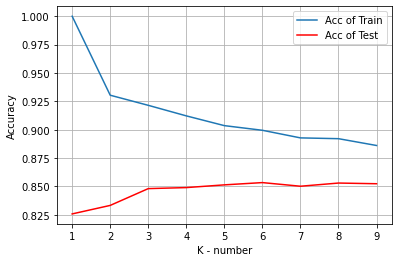

In [6]:
x1 = np.array([1, 2,3,4,5,6,7,8,9])
y1 = np.array([1.0, 0.9304,0.9215,0.9122,0.9036,0.8995,0.8928,0.8921,0.8861])
x2 = np.array([1, 2,3,4,5,6,7,8,9])
y2 = np.array([0.8258,0.8333,0.8481, 0.8490,0.8514,0.8534,0.8502,0.8530,0.8524])
plt.plot(x1, y1, x2, y2,"r")

plt.xlabel('K - number')
plt.ylabel('Accuracy')
plt.legend(['Acc of Train', 'Acc of Test']);
plt.grid()
plt.show()